## PREDICTING DEFAULTERS ON CREDIT CARDS USING CLASSIFICATION ALGORITHMS

**Abstract:** This project aims to predict customers default on credit cards payments and compare the accuracy of the prediction among several machine learning algorithms.


In this notebook, we'll explore the feasibility of implementing a Neural Network and Boosting algorithm to predict credit card defaulters. We will also attempt to reduce the dimensionality of the dataset using PCA and compare the performance and accuracy of the modified dataset against the original dataset.

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

### Load Dataset

The dataset is loaded into a pandas dataframe. The dimensions and datatypes of the columns are identified. The top rows are also checked to verify if it matches the datatypes.

In [2]:
dataset = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',skiprows=1)

In [3]:
dataset.shape

(30000, 25)

In [4]:
dataset.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
dataset.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

### Fix Datatypes

Several categorical values have been misidentified ad integers, the datatypes are corrected.

In [6]:
# Rename defaults column
dataset.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)

# Change categorical columns to category
dataset['SEX'] = dataset.SEX.astype('category')
dataset['EDUCATION'] = dataset.EDUCATION.astype('category')
dataset['MARRIAGE'] = dataset.MARRIAGE.astype('category')
dataset['DEFAULT'] = dataset.DEFAULT.astype('category')

dataset['PAY_0'] = dataset.PAY_0.astype('category')
dataset['PAY_2'] = dataset.PAY_2.astype('category')
dataset['PAY_3'] = dataset.PAY_3.astype('category')
dataset['PAY_4'] = dataset.PAY_4.astype('category')
dataset['PAY_5'] = dataset.PAY_5.astype('category')
dataset['PAY_6'] = dataset.PAY_6.astype('category')

In [7]:
dataset.dtypes

ID              int64
LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
DEFAULT      category
dtype: object

### Analyze the Dataset

In [8]:
# Distribution of defaulters/non-defaulters
print(dataset.groupby('DEFAULT').size())

DEFAULT
0    23364
1     6636
dtype: int64


The distribution is unbalanced, a weighted scoring will be necessary to obtain an accurate f1, precision and recall score.

#### Using Normalized Bar Charts to identify Groups that are more likely to go into default

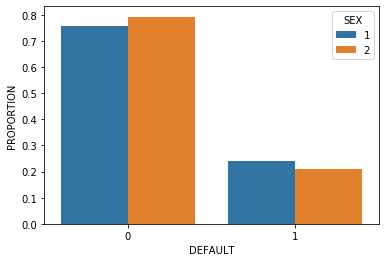

In [9]:
x, y, hue = "DEFAULT", "PROPORTION", "SEX"
hue_order = ["0", "1"]

(dataset[x]
 .groupby(dataset[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

1=male, 2=female

The barplot shows that men are slightly more likely to go into default.

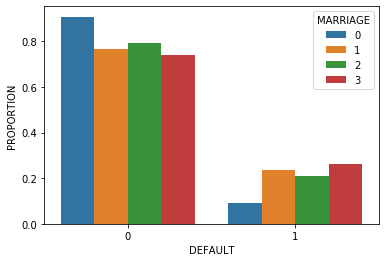

In [10]:
x, y, hue = "DEFAULT", "PROPORTION", "MARRIAGE"
hue_order = ["0", "1"]

(dataset[x]
 .groupby(dataset[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

1=married, 2=single, 3=others

The barplot shows that single individuals are less likely to go into default.

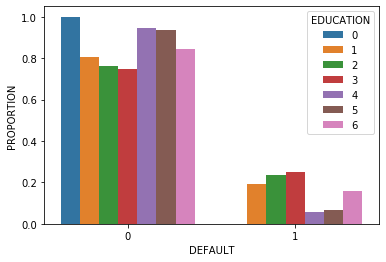

In [11]:
x, y, hue = "DEFAULT", "PROPORTION", "EDUCATION"
hue_order = ["0", "1"]

(dataset[x]
 .groupby(dataset[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

1=graduate school, 2=university, 3=high school 

The graph shows that those with a graduate school education are less likely to go into default compared to university and high school graduates.

### Identify Correlation

#### Correlation Map
A correlation map is used to identify highly correlated attributes. These attributes will be prime candidates for dimensionality reduction.

(15.5, -0.5)

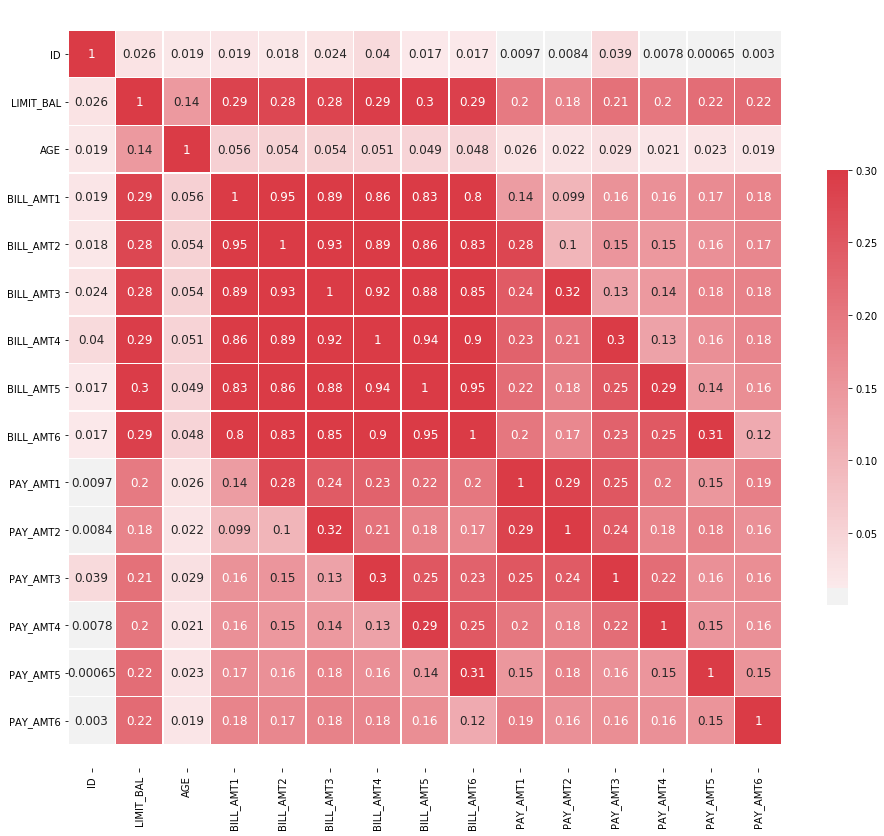

In [12]:
corr = dataset.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, 
            cmap=cmap, vmax=.3, center=0, 
            annot=True, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 12},
           )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

By looking at the correlation graph, the atributes containing information on the payment type, bill amount and pay amount have a high correlation. The values provided by these attributes have a high likelyhood of being redundant. We can attempt a dimensionality reduction on these attributes to reduce the number of features that will be used to train our machine learning models.

### Reduce Dimensions of Highly Correlated Variables

- The attributes containing payment type, bill amount and payment amount is selected for dimensionality reduction using PCA
- These features are selected to reduce the dimensionality of the dataset. 
- This should help reduce the amout of time and resources needed to train the dataset.
- In total 18 attributes out of 24 will be dimensionally reduced to  6. 
- This results in a 66% reduction in the selected attributes and a 50% reduction in the total dataset.

In [13]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
# Selecting attribute names that will be dimensionally reduced
features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
others   = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'DEFAULT']


# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:, others].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Executing the PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [15]:
principalDf.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.774457,-0.613834,-0.633142,-0.474713,-0.033614,-0.077654
1,-0.660334,-2.051521,0.426726,0.113607,0.148504,-0.100264
2,-0.766104,-0.934008,0.023527,-0.003720,-0.099812,-0.113338
3,-0.114276,-0.627801,-0.289996,0.133394,-0.044445,0.052357
4,-0.851808,0.029702,0.965619,0.731632,0.121898,0.497529
5,-0.110665,-0.628206,-0.346854,0.128097,-0.128335,0.038118
6,13.813784,7.323383,-1.501441,1.793182,0.257714,0.531249
7,-1.780951,-0.345811,-0.154896,0.035212,-0.065904,0.077432
8,-0.614489,-1.649140,0.197939,0.043683,-0.064436,-0.024647
9,-2.849881,1.848087,-0.389603,0.219857,0.677132,-0.187578


In [16]:
# Combine the PCA results with the remaining dataset.
finalDf = pd.concat([dataset[others], principalDf], axis = 1)
finalDf.head(10)
finalDf.to_csv('pca.csv', index=False)

### Check Correlation of Dimensionally Reduced Dataset

(9.5, -0.5)

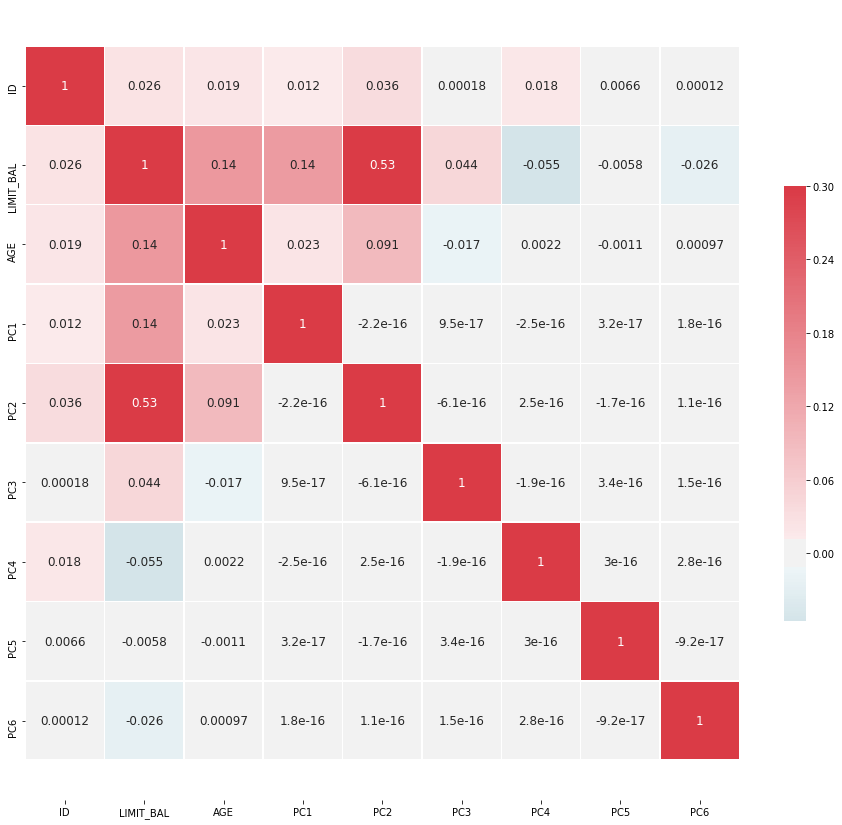

In [17]:
corr = finalDf.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, 
            cmap=cmap, vmax=.3, center=0, 
            annot=True, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 12},
           )

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The dataset shows that there aren't any more clusters or groups of highly correlated attributes. The dimensionality reduction can be considerd successful.

### Machine Learning

In [18]:
# Import Library
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# Weighting and Cross Validation
from numpy import average
from multiscorer import MultiScorer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score       
from sklearn.model_selection import cross_val_score

In [19]:
# Define Scores to Measure
scorer = MultiScorer({
    'ROC AUC'   : (roc_auc_score , {}),
    'Accuracy'  : (accuracy_score , {}),
    'F1 Score'  : (f1_score       , {'average':'weighted'}),
    'Precision' : (precision_score, {'average':'weighted'}),
    'Recall'    : (recall_score   , {'average':'weighted'})
})

#### MLPClassifier (Multi Layer Perceptron Classifier)

In [20]:
# Tune Hyperparameters for Multi Layer Perceptron Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 8, 6),
                          activation='relu', 
                          solver='adam', 
                          alpha=0.0001, 
                          max_iter=1000)

#### AdaBoostClassifier (Boosting)

In [21]:
# Tune Hyperparameters for Multi Layer Perceptron Classifier
ada_model = AdaBoostClassifier(learning_rate=0.5, 
                              n_estimators=100,
                              algorithm='SAMME.R')

In [22]:
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10)

### Scoring MLPClassifier and AdaBoost with Unmodified Dataset (no PCA)

In [24]:
# Prepare x and y data
mlDf = dataset.drop(['ID'], axis=1)
X_full = mlDf.drop(['DEFAULT'], axis=1)
y = mlDf['DEFAULT']

# Scale the dataset
X_full = StandardScaler().fit_transform(X_full)

In [25]:
start = time.time()
_ = cross_val_score(gaussian_model, X_full, y,scoring=scorer, cv=5)
results = scorer.get_results()

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print('%s : %f' % (metric_name, average_score))

print('Time', time.time() - start, '\n\n')

ROC AUC : 0.686135
Accuracy : 0.705302
F1 Score : 0.725537
Precision : 0.774423
Recall : 0.705302
Time 0.374561071395874 




In [26]:
start = time.time()
_ = cross_val_score(rf_model, X_full, y,scoring=scorer, cv=5)
results = scorer.get_results()

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print('%s : %f' % (metric_name, average_score))

print('Time', time.time() - start, '\n\n')

ROC AUC : 0.660467
Accuracy : 0.755651
F1 Score : 0.753975
Precision : 0.779194
Recall : 0.755651
Time 4.9240639209747314 




### Scoring MLPClassifier and AdaBoost using the Dimensionally Reduced Dataset (with PCA)

In [27]:
# Prepare x and y data
mlDf = finalDf.drop(['ID'], axis=1)
X_reduced = mlDf.drop(['DEFAULT'], axis=1)
y = mlDf['DEFAULT']

# Scale the dataset
X_reduced = StandardScaler().fit_transform(X_reduced)

In [28]:
start = time.time()
_ = cross_val_score(gaussian_model, X_reduced, y,scoring=scorer, cv=5)
results = scorer.get_results()

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print('%s : %f' % (metric_name, average_score))

print('Time', time.time() - start, '\n\n')

ROC AUC : 0.652877
Accuracy : 0.729013
F1 Score : 0.735021
Precision : 0.767505
Recall : 0.729013
Time 0.23772287368774414 




In [29]:
start = time.time()
_ = cross_val_score(rf_model, X_reduced, y,scoring=scorer, cv=5)
results = scorer.get_results()

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print('%s : %f' % (metric_name, average_score))

print('Time', time.time() - start, '\n\n')

ROC AUC : 0.643529
Accuracy : 0.746160
F1 Score : 0.743771
Precision : 0.768506
Recall : 0.746160
Time 3.5875213146209717 




### Conclusions

After several runs, the PCA-optimized dataset has an average of 10.25 seconds to train whereas the unoptimized dataset takes 10.65 seconds to train. We can conclude that the use of PCA in neural networks provide little improvements over the use of a full dataset.

There is also little difference between the accuracy of the model trained with the dimensionally reduced dataset and the model trained with the full dataset. We can conclude that Neural Networks do not benefit from dimensionality reduction for this dataset.

